# Jigsaw - Agile Community Rules Classification
### https://www.kaggle.com/competitions/jigsaw-agile-community-rules

In [18]:
import kagglehub
import pandas as pd
import os

base_path = "./data/final/"
df_train = pd.read_csv(f"{base_path}df_train.csv")
print(df_train.shape)
df=df_train.copy()
df_train.head(1)

(26899, 8)


,subreddit,rule,positive_example_1,negative_example_1,positive_example_2,negative_example_2,test_comment,violates_rule
0,askscience_advanced,"""Please use descriptive titles that clearly ex...",Question about a subject,What are the latest advancements in understand...,Help!,Can anyone explain the underlying mechanisms a...,I need to know about cancer,True


In [19]:
# 1. Compute word counts per cell
word_counts = df.applymap(lambda x: len(str(x).split()))
# 2. Filter rows where all columns have word count <= 60
df_filtered = df[word_counts.le(60).all(axis=1)]
print("Word counts per cell:\n", word_counts)
print("\nFiltered dataframe:\n", df_filtered)
df=df_filtered.copy()

Word counts per cell:
        subreddit  rule  positive_example_1  negative_example_1  \
0              1    11                   4                  29   
1              1    10                  21                  45   
2              1     8                  11                  24   
3              1    10                  25                  60   
4              1    12                  28                  34   
...          ...   ...                 ...                 ...   
26894          1    14                  37                  27   
26895          1    10                  26                  20   
26896          1    11                  17                  18   
26897          1    13                  17                  11   
26898          1    14                  28                  28   

       positive_example_2  negative_example_2  test_comment  violates_rule  
0                       1                  24             6              1  
1                      17     

/tmp/ipykernel_6954/3349881331.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = df.applymap(lambda x: len(str(x).split()))


In [20]:
# Columns to check
cols_to_check = ["positive_example_1", "negative_example_1", 
                 "positive_example_2", "negative_example_2", "test_comment"]

# Calculate word counts only for selected columns
word_counts = df[cols_to_check].applymap(lambda x: len(str(x).split()))

# Keep rows where all selected columns have at least 6 words
df_filtered = df[word_counts.ge(6).all(axis=1)]

print("Word counts in selected columns:\n", word_counts)
print("\nFiltered dataframe:\n", df_filtered)
df=df_filtered.copy()

/tmp/ipykernel_6954/1676077373.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = df[cols_to_check].applymap(lambda x: len(str(x).split()))


Word counts in selected columns:
        positive_example_1  negative_example_1  positive_example_2  \
0                       4                  29                   1   
1                      21                  45                  17   
2                      11                  24                   9   
3                      25                  60                  18   
4                      28                  34                  32   
...                   ...                 ...                 ...   
26894                  37                  27                  33   
26895                  26                  20                  18   
26896                  17                  18                  23   
26897                  17                  11                  18   
26898                  28                  28                  33   

       negative_example_2  test_comment  
0                      24             6  
1                      38            26  
2          

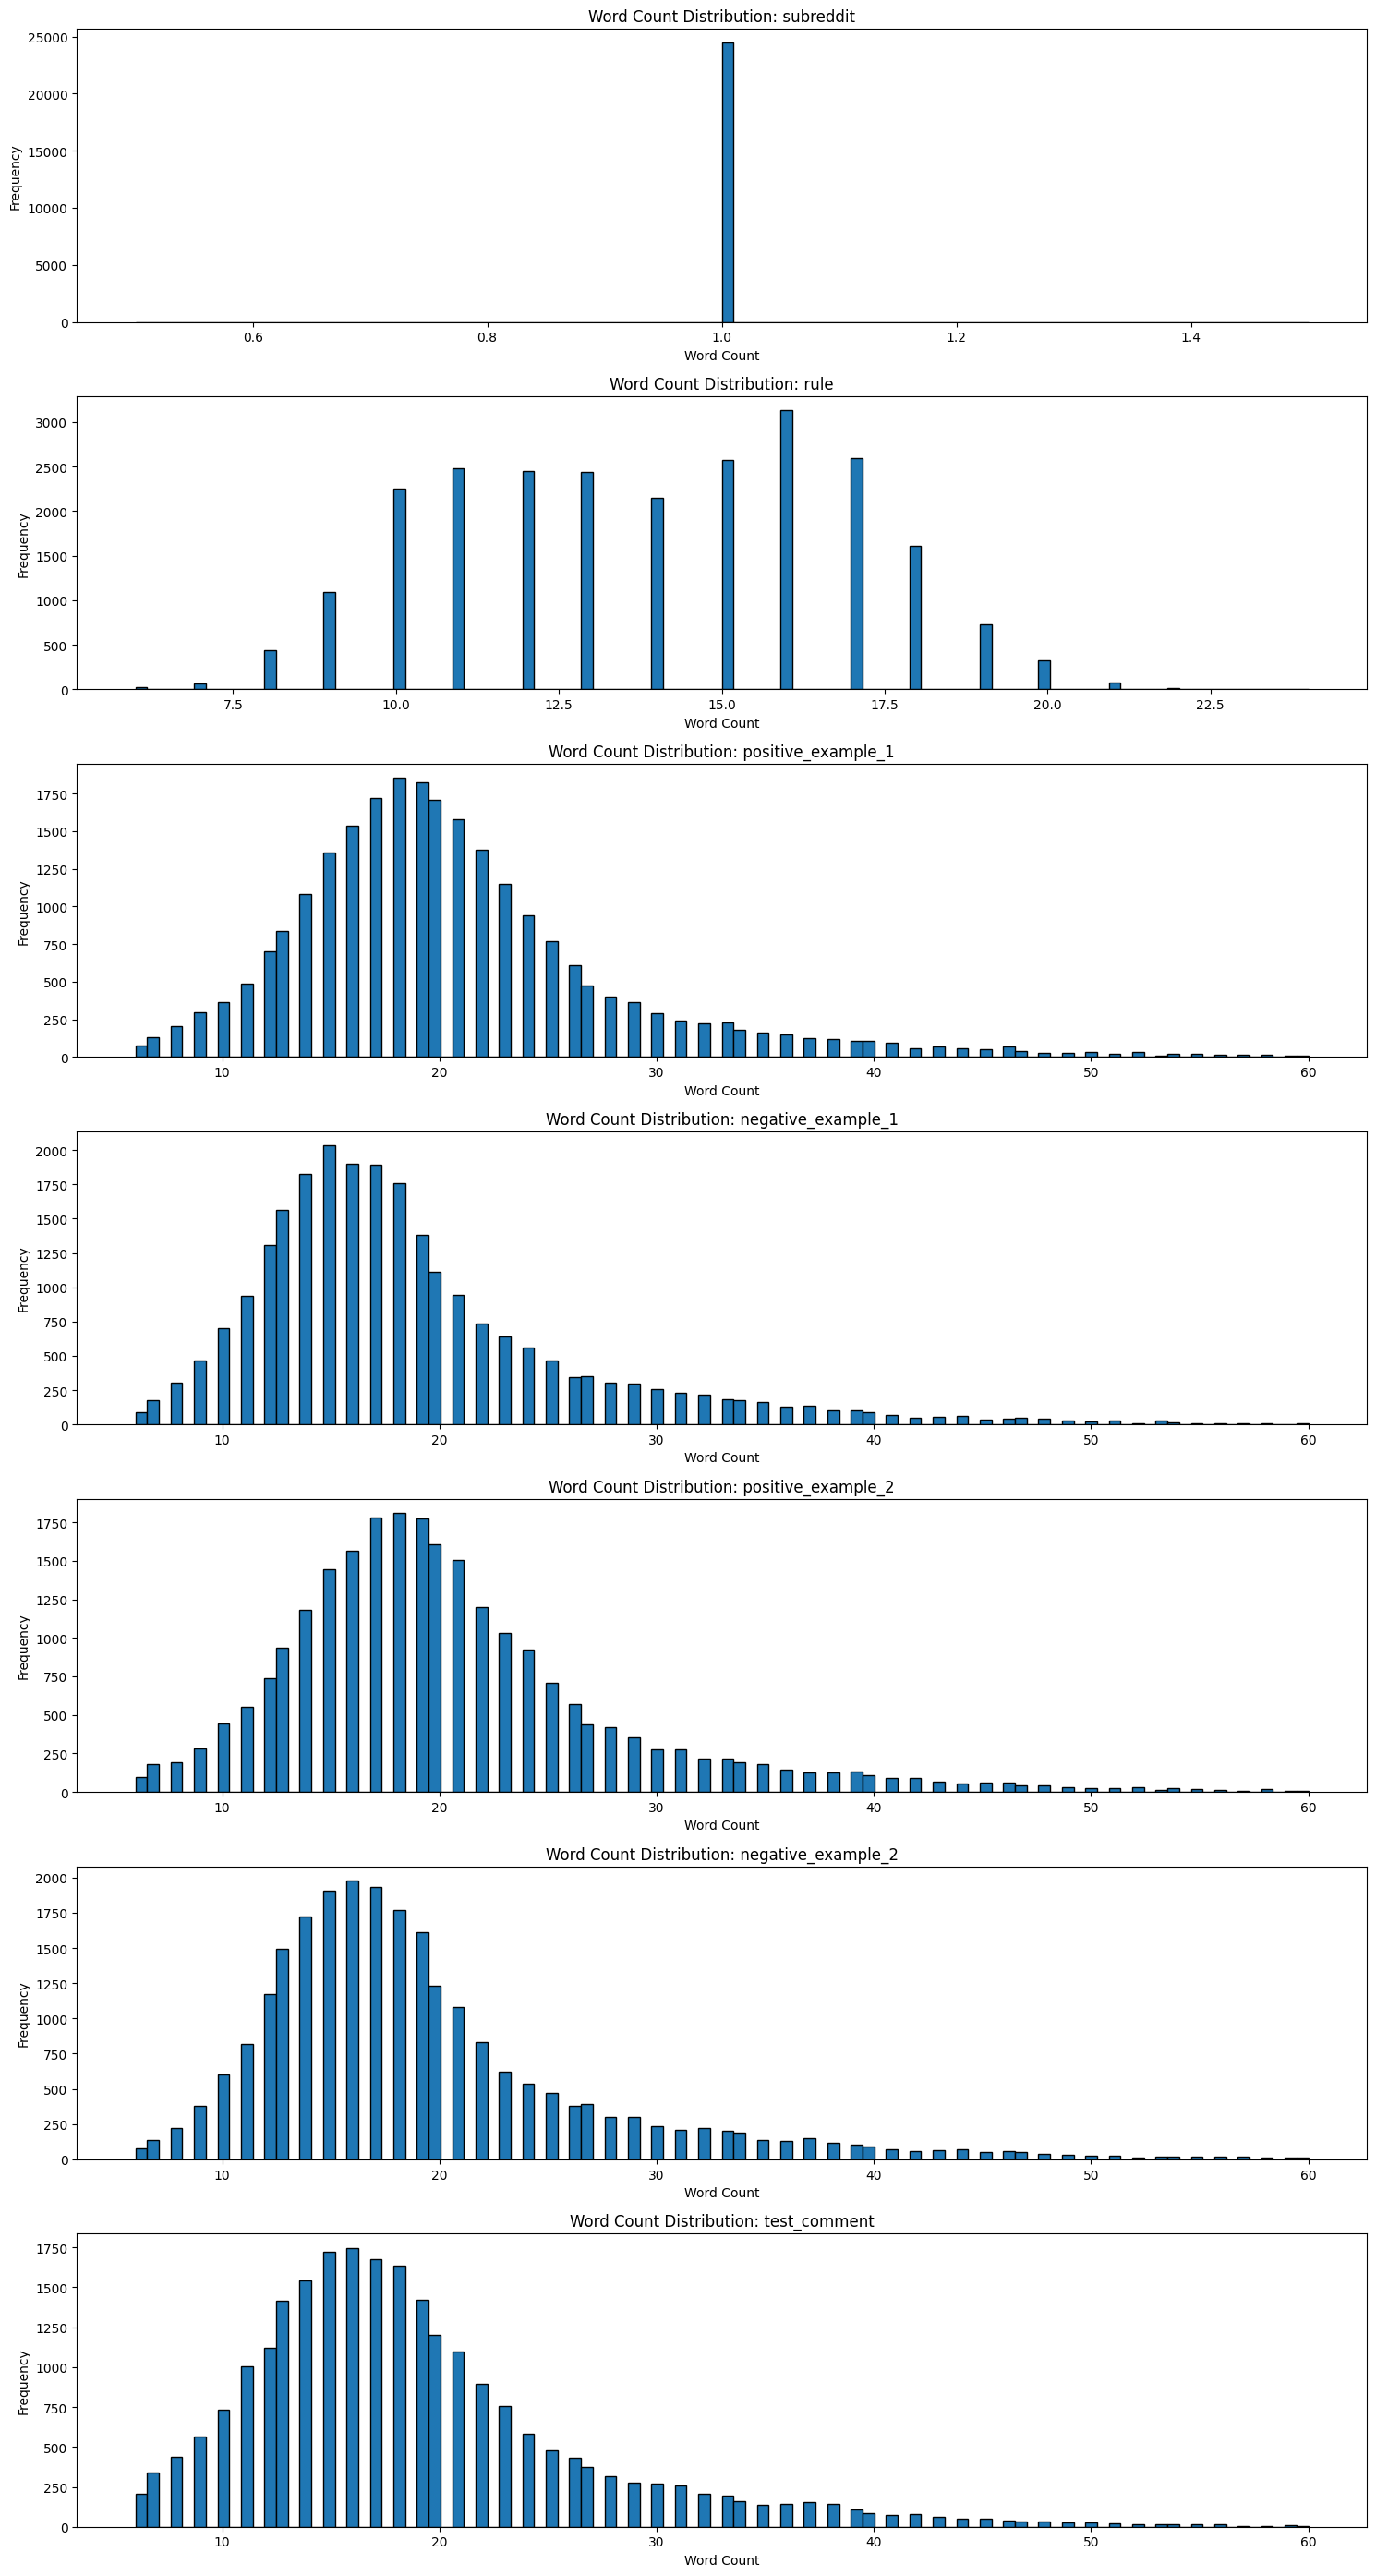

          subreddit                                               rule  \
1         astronomy  "Help maintain community standards through pos...   
2         pansexual  "Celebrate member achievements and milestones ...   
3          gay_bros  "Include your goals and objectives when asking...   
4  religious_debate  "No Referral Codes: Discount codes referral li...   
5        casualiama  "No Harassment: Personal attacks insults haras...   

                                  positive_example_1  \
1  "Wow, you're still confused about the differen...   
2  "Ugh, Sarah got a promotion at work? Who cares...   
3  "Guys, I need advice on how to approach this c...   
4  "Hey, I found this amazing meditation app that...   
5  "Wow, you're really stupid if you think that's...   

                                  negative_example_1  \
1  "It's understandable to be a little confused a...   
2  "Hey everyone, let's give a huge shout-out to ...   
3  "Guys, I need advice on how to approach this c.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Example: df = pd.read_csv("your_file.csv")

# Select only text-like columns
text_df = df.select_dtypes(exclude=["bool", "int", "float"])

# Create new columns with word counts for each original column
for col in text_df.columns:
    df[col + "_word_count"] = text_df[col].apply(lambda x: len(str(x).split()))

# Plot histogram for each column's word count
num_cols = len(text_df.columns)
plt.figure(figsize=(15, 4 * num_cols))

for i, col in enumerate(text_df.columns):
    plt.subplot(num_cols, 1, i + 1)
    plt.hist(df[col + "_word_count"], bins=100, edgecolor='black')
    plt.title(f"Word Count Distribution: {col}")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    #plt.xlim([0,50])

plt.tight_layout()
plt.show()

# Optional: see first few rows with new word count columns
print(df.head())


In [23]:
df.shape

(24442, 15)

In [24]:
df.to_csv("df_final.csv",index=False)